In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importing required modules\librearies

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
## Original PIMA Indian dataset

originalDf = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/datasets_14370_19291_pima-indians-diabetes.csv')

originalDf.columns = ['preg', 'glu', 'BP', 'skinTh', 'insulin', 'BMI', 'diaPedFun', 'age', 'class']

originalDf

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Number of diabetic data points in the original dataset

Diabetic = originalDf[originalDf['class'] == 1]

Diabetic.shape

(267, 9)

In [ ]:
# Number of Non diabetic data points in the original dataset

Non_Diabetic = originalDf[originalDf['class'] == 0]

Non_Diabetic.shape

(500, 9)

In [ ]:
## Setting up a copy of original dataFrame to work with

dfCopy = originalDf.copy()

del dfCopy['class']

## Using minMax Scaler
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(dfCopy)

#transform the test set
X_scaled = scaler.transform(dfCopy)

df = pd.DataFrame(X_scaled)

df.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age']

df

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
## Function to calculate Eucledian Distance

def dist(plist1, plist2):
  return math.sqrt( (plist1[0] - plist2[0])**2 + (plist1[1] - plist2[1])**2 + (plist1[2] - plist2[2])**2 + (plist1[3] - plist2[3])**2 + (plist1[4] - plist2[4])**2 + (plist1[5] - plist2[5])**2 + (plist1[6] - plist2[6])**2 + (plist1[7] - plist2[7])**2) 

In [ ]:
begin = time.time();  #timer start

In [ ]:
## To find Xmin data point ---> data point with minimumt distance from origin

origin = pd.Series([0,0,0,0,0,0,0,0])

rows, columns = df.shape

df['dFromOrigin'] = 0   ## Adding attribute/Column 'dFromOrigin' to the dataframe

for i in range (rows):
  df['dFromOrigin'].iloc[i] = dist(origin, df.iloc[i])   ## Calculating Eucledian distance

Xmin = df.dFromOrigin.min() ## Value of Xmin

XminRow = df[df['dFromOrigin'] == df.dFromOrigin.min()]  ## Xmin data point (row)

del XminRow['dFromOrigin']   ## Some waste management

XminRow   ## Displaying Xmin data point

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
80,0.117647,0.371859,0.0,0.0,0.0,0.0,0.010248,0.016667


In [ ]:
## To find Xmax data point   ----->   data point with maximum distance from Xmin data point

df['dFromXmin'] = 0

for i in range (rows):
  df['dFromXmin'].iloc[i] = dist(XminRow.iloc[0], df.iloc[i])

Xmax = df.dFromXmin.max()  ## Value of Xmax

XmaxRow = df[df['dFromXmin'] == df.dFromXmin.max()]

del XmaxRow['dFromOrigin']  ## Waste management
del XmaxRow['dFromXmin']   ## Waste management

XmaxRow

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
227,0.235294,0.98995,0.57377,0.393939,0.879433,0.546945,0.961144,0.166667


In [ ]:
## Distance of data points from Xmax data point 

df['dFromXmax'] = 0

for i in range (rows):
  df['dFromXmax'].iloc[i] = dist(XmaxRow.iloc[0], df.iloc[i])

df.head(2)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax
0,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667,0.873437,0.758908,1.366949
1,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333,1.249330,0.952560,1.237763


In [ ]:
## Forming Clusters

df['cluster'] = 0

for i in range (rows):
  if ( (df.dFromXmin.iloc[i] < df.dFromXmax.iloc[i]) ) :
    df['cluster'].iloc[i] = 1
  else : df['cluster'].iloc[i] = 0

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.873437,0.758908,1.366949,1
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.249330,0.952560,1.237763,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.859815,0.737935,1.356315,1
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.445305,1.305142,0.826101,0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.982355,0.780205,1.397156,1
...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.415632,1.271415,1.396105,1
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.056683,0.883077,1.292165,1
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.027647,0.825036,1.245133,1
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.024024,0.836405,1.374513,1


In [ ]:
end = time.time(); #end time

print(f"Total runtime of the program is {end - begin} seconds.")

Total runtime of the program is 1.1777212619781494 seconds.


In [ ]:
## Cluster 1

df[df['cluster'] == 1]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.873437,0.758908,1.366949,1
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.249330,0.952560,1.237763,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.859815,0.737935,1.356315,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.982355,0.780205,1.397156,1
5,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,0.832883,0.713373,1.340853,1
...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.415632,1.271415,1.396105,1
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.056683,0.883077,1.292165,1
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.027647,0.825036,1.245133,1
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.024024,0.836405,1.374513,1


In [ ]:
## Cluster 0

df[df['cluster'] == 0]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax,cluster
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.445305,1.305142,0.826101,0
7,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.560081,1.343113,1.037423,0
11,0.588235,0.698492,0.655738,0.000000,0.000000,0.403875,0.581981,0.600000,1.457985,1.260320,1.223452,0
12,0.058824,0.949749,0.491803,0.232323,1.000000,0.448584,0.136635,0.633333,1.679981,1.493566,0.993680,0
15,0.000000,0.592965,0.688525,0.474747,0.271868,0.682563,0.201964,0.166667,1.288189,1.166722,1.093865,0
...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.117647,0.874372,0.721311,0.373737,0.141844,0.663189,0.242528,0.050000,1.399856,1.194778,1.066277,0
739,0.647059,0.603015,0.655738,0.373737,0.177305,0.630402,0.301879,0.450000,1.440298,1.266906,1.158125,0
743,0.764706,0.768844,0.721311,0.373737,0.165485,0.605067,0.467976,0.300000,1.593223,1.385473,1.060865,0
752,0.000000,0.909548,0.721311,0.444444,0.602837,0.645306,0.061486,0.083333,1.528285,1.344497,0.994312,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
 
df2 = df.copy()

## some formatting
del df2['dFromOrigin']
del df2['dFromXmin']
del df2['dFromXmax']

In [ ]:
df3 = df2.copy()
df4 = df2.copy()
del df3['cluster']
df3['class'] = originalDf['class']
df3

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [ ]:
 ## Eliminating wrongly clustered tuples
 
for i in range(rows):
  if (df2['cluster'].iloc[i] == df3['class'].iloc[i]):
    df4 = df4.drop(labels=i, axis=0)
    
df4

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,1
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,1
...,...,...,...,...,...,...,...,...,...
761,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,1
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1


In [ ]:
## Class 0

df4[df4['cluster'] == 0].shape

(73, 9)

In [ ]:
##Class 1

df4[df4['cluster'] == 1].shape

(469, 9)

In [ ]:
inputs = df4.drop('cluster', axis=1)
target = df4['cluster']

In [ ]:
# Splitting test and train datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, shuffle=False)

# X_train  ---> Training data without class label
# y_train  ---> Training class labels of X_train

# X_test  ---> Testing data without class label
# y_test  ---> Testing class labels of X_test

In [ ]:
X_train.shape  ## Training data without class label

(379, 8)

In [ ]:
X_test.shape  ## Testing data without class label

(163, 8)

In [ ]:
y_train.shape  ## Training class labels of X_train

(379,)

In [ ]:
y_test.shape  ## Testing class labels of X_test

(163,)

In [ ]:
## Importing GaussianNB model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [ ]:
## Building the model

model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
## Model accuracy

model.score(X_test,y_test)

0.9693251533742331

In [ ]:
## Selecting a small part of X_test (first 10 in this case)

X_test[0:10]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
543,0.058824,0.442211,0.639344,0.292929,0.089835,0.476900,0.122545,0.133333
544,0.470588,0.934673,0.737705,0.353535,0.265957,0.514158,0.147310,0.266667
545,0.294118,0.939698,0.622951,0.272727,0.244681,0.649776,0.408198,0.533333
546,0.235294,0.658291,0.557377,0.212121,0.196217,0.493294,0.035013,0.116667
547,0.058824,0.824121,0.672131,0.434343,0.079196,0.488823,0.112297,0.483333
549,0.058824,0.582915,0.573770,0.282828,0.000000,0.408346,0.053800,0.000000
550,0.176471,0.422111,0.557377,0.303030,0.125296,0.475410,0.219044,0.066667
551,0.352941,0.572864,0.721311,0.000000,0.000000,0.414307,0.072161,0.750000
552,0.058824,0.442211,0.508197,0.242424,0.052009,0.445604,0.146883,0.033333
553,0.058824,0.422111,0.524590,0.232323,0.135934,0.549925,0.167805,0.116667


In [ ]:
## Selecting a small part of y_test (first 10 in this case)


y_test[0:10]

543    1
544    0
545    0
546    1
547    1
549    1
550    1
551    1
552    1
553    1
Name: cluster, dtype: int64

In [ ]:
 ## Predicting class labels of given input data
 
 model.predict(X_test[0:10])

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
model.predict_proba(X_test[:10])

array([[3.99485888e-04, 9.99600514e-01],
       [9.96329753e-01, 3.67024670e-03],
       [9.99843814e-01, 1.56186333e-04],
       [1.32533979e-02, 9.86746602e-01],
       [5.26802415e-01, 4.73197585e-01],
       [4.15491844e-04, 9.99584508e-01],
       [4.35024085e-04, 9.99564976e-01],
       [1.08375414e-04, 9.99891625e-01],
       [3.54668299e-05, 9.99964533e-01],
       [2.61302601e-04, 9.99738697e-01]])

In [ ]:
truth = y_test
prediction =  model.predict(X_test)

print(classification_report(truth, prediction))

# The precision will be "how many are correctly classified among that class" -----> minimizing false psitives
# The recall means "how many of this class you find over the whole number of element of this class" -----> minimizing false negatives
# The f1-score is the harmonic mean between precision & recall
# The support is the number of occurence of the given class in your dataset (so you have 24 of class 0 and 139 of class 1)

# Macro-averaged: all classes equally contribute to the average
# Weighted-average: each classes's contribution to the average is weighted by its size

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        24
           1       1.00      0.96      0.98       139

    accuracy                           0.97       163
   macro avg       0.91      0.98      0.94       163
weighted avg       0.97      0.97      0.97       163



In [ ]:
# plot_confusion_matrix(model, X_test, y_test)

In [ ]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

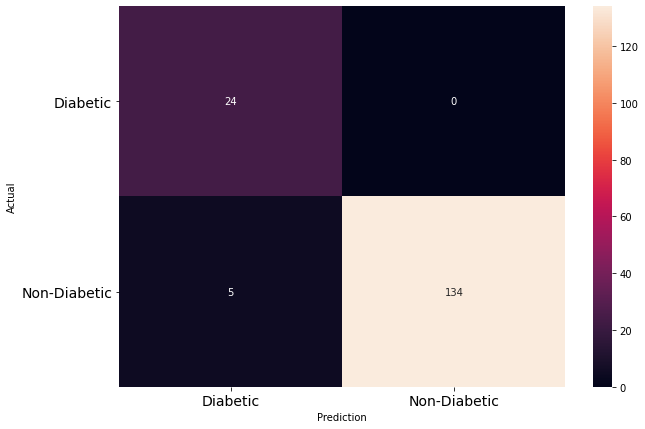

In [ ]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Diabetic","Non-Diabetic"])



---



---



---

Testing Performance with new Data

---



---



---


In [ ]:
newDf = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/DiabetesDataSet_2.csv')

newDf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
## Using minMax Scaler
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(newDf)

#transform the test set
X_scaled = scaler.transform(newDf)

newDf = pd.DataFrame(X_scaled)

newDf.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age', 'class']

newDf

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,1.0
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0.0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,1.0
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,1.0
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000,0.0
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000,1.0
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000,0.0
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333,1.0


In [ ]:
originalClassLabels = newDf['class']

In [ ]:
originalClassLabels.shape

(2000,)

In [ ]:
testingData = newDf.drop(columns=['class'])
testingData

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000
...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333


In [ ]:
 predictedLabels = model.predict(testingData)

In [ ]:
print(classification_report(originalClassLabels, predictedLabels))

              precision    recall  f1-score   support

         0.0       0.34      0.09      0.15      1316
         1.0       0.27      0.66      0.39       684

    accuracy                           0.29      2000
   macro avg       0.31      0.38      0.27      2000
weighted avg       0.32      0.29      0.23      2000



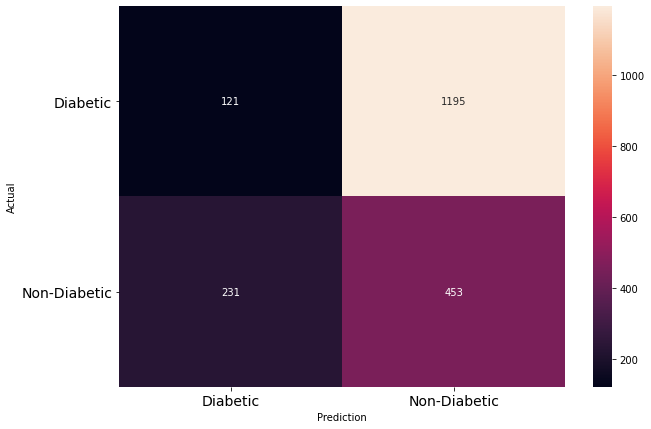

In [ ]:
cm2 = confusion_matrix(originalClassLabels,predictedLabels)
print_confusion_matrix(cm2,["Diabetic","Non-Diabetic"])